In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df=pd.get_dummies(df,columns=['gender','country'],dtype=int)
df.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_Female,gender_Male,country_France,country_Germany,country_Spain
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
df[["credit_score","age","tenure","balance","products_number","estimated_salary"]]=SS.fit_transform(df[["credit_score","age","tenure","balance","products_number","estimated_salary"]])

In [ ]:
df.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_Female,gender_Male,country_France,country_Germany,country_Spain
0,15634602,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,1,0,1,0,0
1,15647311,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,1,0,0,0,1
2,15619304,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,1,0,1,0,0
3,15701354,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,1,0,1,0,0
4,15737888,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,1,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop('churn',axis=1)
y=df['churn']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# def sigmoid(z):
#     z = np.clip(z, -500, 500)  # Clamp values to avoid overflow
#     return 1 / (1 + np.exp(-z))

# def computeCost(X,y,weight):
#     m=y.shape[0]
#     predictions=sigmoidFunction(np.dot(X,weight))
#     cost=-1/m * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
#     return cost

# def gradient_descent(X, y, weights, learning_rate, num_epochs):
#     """Perform gradient descent to optimize weights."""
#     m = y.shape[0]
#     cost_history = []

#     # Ensure y is a column vector for matrix operations
#     y = y.reshape(-1, 1)

#     for epoch in range(num_epochs):
#         # Compute predictions and ensure it's a column vector
#         predictions = sigmoid(np.dot(X, weights)).reshape(-1, 1)

#         # Calculate gradient
#         gradient = np.dot(X.T, (predictions - y)) / m

#         # Update weights
#         weights -= learning_rate * gradient

#         # Compute and store the cost
#         cost = compute_cost(X, y, weights)
#         cost_history.append(cost)

#         if epoch % 100 == 0:
#             print(f"Epoch {epoch}: Cost = {cost:.4f}")

#     return weights, cost_history



# def plotCost(costHistory, numEpochs):
#     plt.plot(range(numEpochs), costHistory, label="Training Cost")
#     plt.xlabel("Epochs")
#     plt.ylabel("Cost")
#     plt.title("Cost vs. Epochs")
#     plt.legend()
#     plt.grid(True)
#     plt.show()
def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, weights):
    m = y.shape[0]
    predictions = sigmoid(np.dot(X, weights))
    epsilon = 1e-5
    cost = (-1 / m) * np.sum(y * np.log(predictions + epsilon) + (1 - y) * np.log(1 - predictions + epsilon))
    return cost

def gradient_descent(X, y, weights, learning_rate, num_epochs):
    m = y.shape[0]
    cost_history = []
    y = y.values.reshape(-1, 1)
    for epoch in range(num_epochs):
        predictions = sigmoid(np.dot(X, weights)).reshape(-1, 1)
        gradient = np.dot(X.T, (predictions - y)) / m
        weights -= learning_rate * gradient

        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Cost = {cost:.4f}")

    return weights, cost_history
def plot_cost(train_cost, test_cost):
    plt.figure(figsize=(10, 6))
    plt.plot(range(10), train_cost[:10], 'o-', label='Training Cost', color='blue')
    plt.plot(range(10), test_cost[:10], 'o-', label='Testing Cost', color='orange')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Training and Testing Cost (First 10 Points)')
    plt.legend()
    plt.show()

Epoch 0: Cost = 2.3717
Epoch 100: Cost = 2.3717
Epoch 200: Cost = 2.3717
Epoch 300: Cost = 2.3717
Epoch 400: Cost = 9.1413
Epoch 500: Cost = 2.3717
Epoch 600: Cost = 2.3717
Epoch 700: Cost = 2.3717
Epoch 800: Cost = 2.3717
Epoch 900: Cost = 9.1413


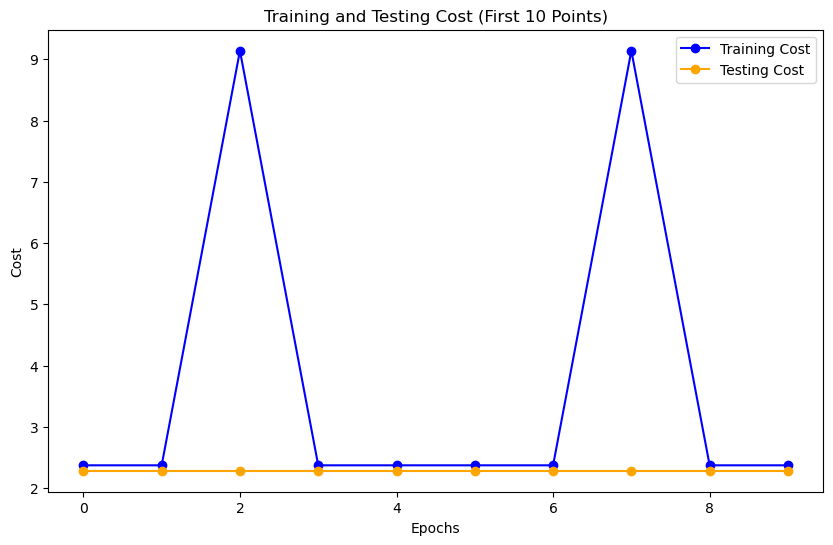

In [ ]:
weights = np.zeros((X_train.shape[1], 1))
learning_rate = 0.01
num_epochs = 1000
weights, train_cost_history = gradient_descent(X_train, y_train, weights, learning_rate, num_epochs)
test_cost_history = []
for epoch in range(num_epochs):
    test_cost = compute_cost(X_test, y_test.values.reshape(-1, 1), weights)
    test_cost_history.append(test_cost)
plot_cost(train_cost_history, test_cost_history)

# Part 2

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def train_logistic_regression(X_train, y_train):
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'max_iter': [100, 200, 500, 1000]
    }
    log_reg = LogisticRegression(solver='lbfgs', random_state=42)
    grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    print("Best Parameters:", grid_search.best_params_)
    return best_model
LR = train_logistic_regression(X_train, y_train)


Best Parameters: {'C': 0.01, 'max_iter': 100}


In [ ]:
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = LR.predict(X_train)
    y_test_pred = LR.predict(X_test)

    print("Training Set Metrics:")
    print("Accuracy:", accuracy_score(y_train, y_train_pred))
    print("Precision:", precision_score(y_train, y_train_pred,zero_division=1))
    print("Recall:", recall_score(y_train, y_train_pred))
    print("F1 Score:", f1_score(y_train, y_train_pred))

    print("\nTesting Set Metrics:")
    print("Accuracy:", accuracy_score(y_test, y_test_pred))
    print("Precision:", precision_score(y_test, y_test_pred,zero_division=1))
    print("Recall:", recall_score(y_test, y_test_pred))
    print("F1 Score:", f1_score(y_test, y_test_pred))

    return y_test_pred

y_test_pred = evaluate_model(LR, X_train, y_train, X_test, y_test)


Training Set Metrics:
Accuracy: 0.794
Precision: 1.0
Recall: 0.0
F1 Score: 0.0

Testing Set Metrics:
Accuracy: 0.8016666666666666
Precision: 1.0
Recall: 0.0
F1 Score: 0.0


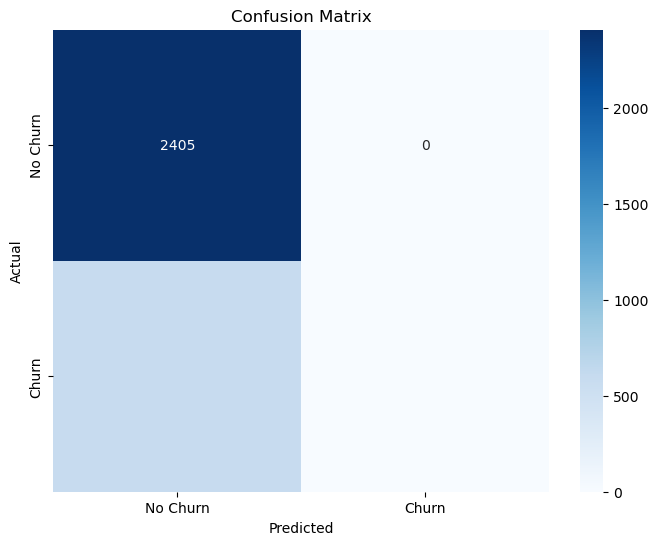

In [ ]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_confusion_matrix(y_test, y_test_pred):
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(y_test, y_test_pred)

In [ ]:
list(y_pred)


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
